# Interactive Plots and Diagrams

In [1]:
using Reactive, Interact

Interactive plotting can be useful and fun. Here we have a few examples to get you started creating your own interactive plots. We will extensively use the `@manipulate` macro from the [introductory notebook](Introduction.ipynb).

## Compose

[Compose](http://composejl.org) is an excellent tool for creating declarative vector graphics. Here is an example compose diagram you can play around with.

Interact.Options{:ToggleButtons,ASCIIString}(Signal{ASCIIString}(yellow, nactions=0),"color","yellow","yellow",Interact.OptionDict(Any["yellow","cyan","tomato"],Dict{Any,Any}("cyan"=>"cyan","yellow"=>"yellow","tomato"=>"tomato")),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(3.1, nactions=0),"rotate",3.1,0.0:0.05:6.25,true)

Interact.Slider{Int64}(Signal{Int64}(11, nactions=0),"n",11,3:20,true)

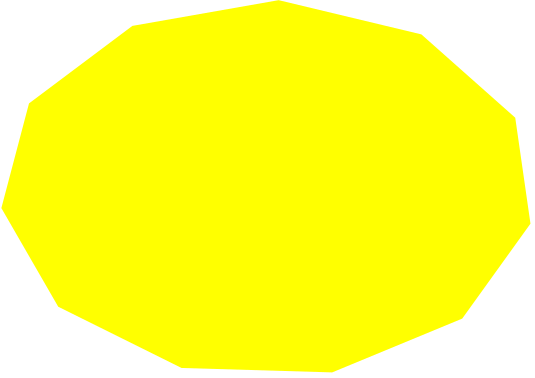

In [2]:
using Colors
using Compose

@manipulate for color=["yellow", "cyan", "tomato"], rotate=0:.05:2π, n=3:20
    compose(context(), fill(parse(Colorant, color)),
    polygon([((1+sin(θ+rotate))/2, (1+cos(θ+rotate))/2) for θ in 0:2π/n:2π]))
end

## Gadfly

In [3]:
using Gadfly

Interact.Slider{Float64}(Signal{Float64}(6.283185307179586, nactions=0),"ϕ",6.283185307179586,0.0:0.19634954084936207:12.566370614359172,true)

Interact.Options{:ToggleButtons,Function}(Signal{Function}(sin, nactions=0),"f",sin,"sin",Interact.OptionDict(Any["sin","cos"],Dict{Any,Any}("cos"=>cos,"sin"=>sin)),Any[],Any[])

Interact.Checkbox(Signal{Bool}(false, nactions=0),"both",false)

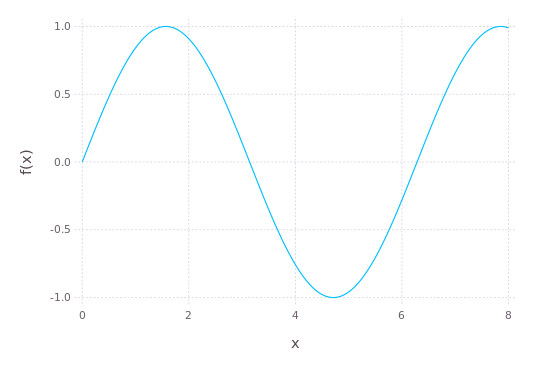

In [4]:
@manipulate for ϕ = 0:π/16:4π, f = [sin, cos], both = false
    if both
        plot([θ -> sin(θ + ϕ), θ -> cos(θ + ϕ)], 0, 8)
    else
        plot(θ -> f(θ + ϕ), 0, 8)
    end
end

Interact.Slider{Int64}(Signal{Int64}(13, nactions=0),"n",13,1:25,true)

Interact.Options{:ToggleButtons,DataType}(Signal{Type{T}}(Gadfly.Geom.PointGeometry, nactions=0),"g",Gadfly.Geom.PointGeometry,"Gadfly.Geom.PointGeometry",Interact.OptionDict(Any["Gadfly.Geom.PointGeometry","Gadfly.Geom.LineGeometry"],Dict{Any,Any}("Gadfly.Geom.LineGeometry"=>Gadfly.Geom.LineGeometry,"Gadfly.Geom.PointGeometry"=>Gadfly.Geom.PointGeometry)),Any[],Any[])

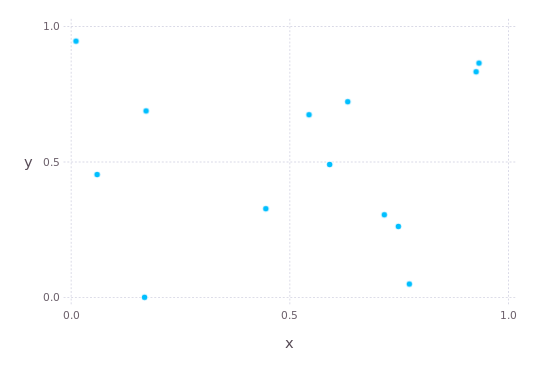

In [5]:
@manipulate for n=1:25, g=[Geom.point, Geom.line]
    Gadfly.plot(y=rand(n), x=rand(n), g)
end

## PyPlot

In [6]:
using PyPlot

Since PyPlot API has functions with side effects, you want to create a figure first and use it in each iteration of `@manipulate` with `withfig`. Notice `f = figure()` and `withfig(f)` in the example below. The rest of it is straightforward.

Interact.Slider{Float64}(Signal{Float64}(2.0, nactions=0),"α",2.0,1.0:0.1:3.0,true)

Interact.Slider{Float64}(Signal{Float64}(2.0, nactions=0),"β",2.0,1.0:0.1:3.0,true)

Interact.Slider{Float64}(Signal{Float64}(2.0, nactions=0),"γ",2.0,1.0:0.1:3.0,true)

Interact.Textbox{AbstractString}(Signal{AbstractString}(a funny plot, nactions=0),"leg",nothing,"a funny plot")

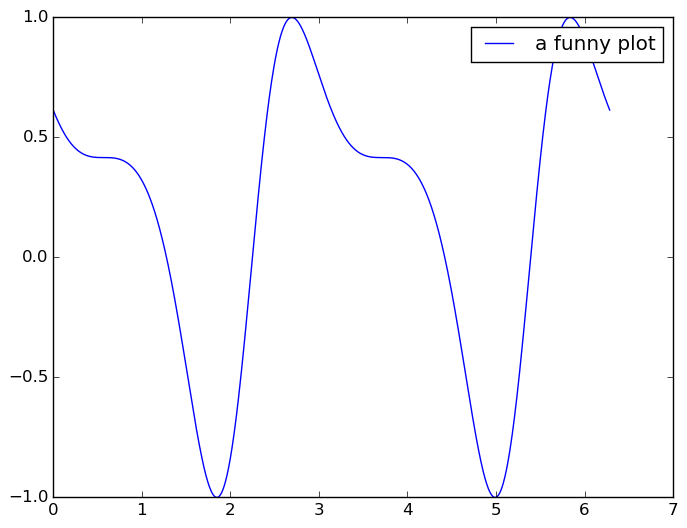

In [7]:
f = figure()
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg="a funny plot"; withfig(f) do
        PyPlot.plot(x, cos(α*x + sin(β*x + γ)))
        legend([leg])
    end
end

As an added bonus, you can even fire up a Python GUI with `pygui(true)` and be able to use the widgets above to update the plot.